In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.rcParams['text.usetex'] = True

### Tutorial 1: Question 1
We seek to solve the following non-linear boundary value problem
\begin{equation}
y''=2y^3,\quad y'(1)=-\frac{1}{4}, \quad y(4)+y'(4)=\frac{4}{25}
\end{equation}
using the shooting method.

In [70]:
a, b = [1, 4] # [start point, end point]
N = 100 # number of points
x = np.linspace(a, b, N+1) # space interval
tol = 10**(-6) # tolerance

The boundary value problem can be converted into an initial value problem of the form
\begin{equation}
\begin{cases}
y' = u \\
u' = 2y^3
\end{cases}
\end{equation}
with initial conditions $y(1)=p$ and $y'(1)=-\frac{1}{4}$.

In [71]:
def f(x, y):
    return y[1], 2*y[0]**3

We can determine an approximate interval $c\leq p \leq d$ such that
\begin{equation}
\begin{cases}
y(4)+y'(4)-\frac{4}{25} < 0, \quad c=p \\
y(4)+y'(4)-\frac{4}{25} > 0, \quad d=p \\
\end{cases}
\end{equation}

In [72]:
for i in np.linspace(0, 1, 10):
    y_initial = i
    y0 = [y_initial, -1/4]
    
    sol = solve_ivp(f, [1, 4], y0, t_eval=x)
    y = sol.y[:,:]
    
    if y[0][-1] + y[1][-1] - 4 / 25 < 0:
        print('p={:.5f}, less than'.format(i))
    elif y[0][-1] + y[1][-1] - 4 / 25 > 0:
        print('p={:.5f}, greater than'.format(i))

p=0.00000, less than
p=0.11111, less than
p=0.22222, less than
p=0.33333, less than
p=0.44444, less than
p=0.55556, greater than
p=0.66667, greater than
p=0.77778, greater than
p=0.88889, greater than
p=1.00000, greater than


We observe that $p$ lies in the approximate interval $0.4\leq p \leq 0.5$. We can now implement the bisection method to find $p$ such that
\begin{equation}
|y_{n-1}-y_n|< \varepsilon
\end{equation}
where $\varepsilon$ is a set tolerance.

In [73]:
def shooting_method_f(p, x, tol=10**(-6)):
    pstart, pend = p
    diff = np.abs(pend - pstart)
    n_iterations = 0
    
    while diff > tol:
        updated_p = (pend + pstart) / 2
        y0 = [updated_p, -1 / 4]
        
        sol = solve_ivp(f, [1, 4], y0, t_eval=x)
        y = sol.y[:,:]
        
        if y[0][-1] + y[1][-1] - 4 / 25 < 0:
            pstart = updated_p
        elif y[0][-1] + y[1][-1] - 4 / 25 > 0:
            pend = updated_p
            
        diff = np.abs(pend - pstart)
        n_iterations += 1

    return [y[0,:], n_iterations]

We can now plot the solution obtained by the shooting method along with the exact solution
\begin{equation}
y(x)=\frac{1}{1+x}
\end{equation}

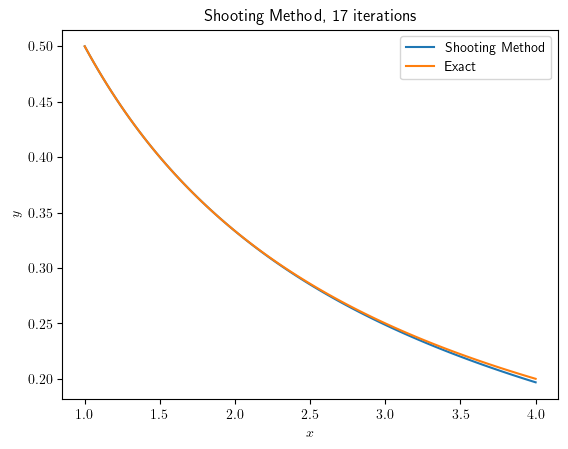

In [74]:
def exact_f(x):
    return 1/(1+x)

y, n_iterations = shooting_method_f([0.4, 0.5], x)
plt.plot(x, y, label=r'Shooting Method')
plt.plot(x, exact_f(x), label='Exact')
plt.title(r'Shooting Method, {} iterations'.format(n_iterations))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()